<a href="https://colab.research.google.com/github/VaishnaviKrishnamoorthy/Chennai_House_Price_Prediction/blob/main/Project_House_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [147]:
df = pd.read_csv('https://raw.githubusercontent.com/VaishnaviKrishnamoorthy/Chennai_House_Price_Prediction/main/train-chennai-sale.csv')

In [148]:
df1 = df.copy

In [149]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


# **Data Cleaning**

In [150]:
print("The original dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]))

The original dataset has 7109 rows and 22 columns


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [152]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [153]:
df.duplicated().sum()

0

# **AREA**

In [154]:
df['AREA'].value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

In [155]:
df['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [156]:
df['AREA'] = df['AREA'].replace("Karapakam","Karapakkam")
df['AREA'] = df['AREA'].replace(["Ana Nagar","Ann Nagar","Anna Nagar"],"AnnaNagar")
df['AREA'] = df['AREA'].replace("Adyr","Adyar")
df['AREA'] = df['AREA'].replace('Velchery','Velachery')
df['AREA'] = df['AREA'].replace(['Chrompet','Chormpet','Chrompt','Chrmpet'],'Chromepet')
df['AREA'] = df['AREA'].replace("KK Nagar",'KKNagar')
df['AREA'] = df['AREA'].replace("T Nagar","TNagar")

In [157]:
df['AREA'].unique()

array(['Karapakkam', 'AnnaNagar', 'Adyar', 'Velachery', 'Chromepet',
       'KKNagar', 'TNagar'], dtype=object)

In [158]:
df['AREA'].value_counts()

Chromepet     1702
Karapakkam    1366
KKNagar        997
Velachery      981
AnnaNagar      788
Adyar          774
TNagar         501
Name: AREA, dtype: int64

In [159]:
df['AREA'].dtype

dtype('O')

# **INT_SQFT**

In [160]:
df['INT_SQFT'].unique()

array([1004, 1986,  909, ...,  688, 2051,  598])

In [161]:
df['INT_SQFT'].isnull().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


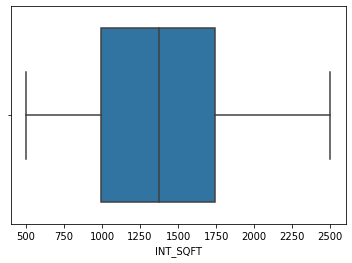

In [162]:
import seaborn as sns
sns.boxplot(df['INT_SQFT'])

In [163]:
df['INT_SQFT'].dtype

dtype('int64')

# **DATE_SALE**

In [164]:
df['DATE_SALE'].isnull().sum()

0

In [165]:
df['DATE_SALE'].unique()

array(['04-05-2011', '19-12-2006', '04-02-2012', ..., '28-03-2014',
       '25-08-2006', '13-07-2005'], dtype=object)

In [166]:
df['DATE_SALE'].dtypes

dtype('O')

In [167]:
df['DATE_SALE'].values[0]

'04-05-2011'

In [168]:
df['DATE_SALE'] = pd.to_datetime(df['DATE_SALE'])

In [169]:
df['DATE_SALE'].values[0]

numpy.datetime64('2011-04-05T00:00:00.000000000')

In [170]:
df.dtypes.value_counts()

object            9
int64             6
float64           6
datetime64[ns]    1
dtype: int64

# **DIST_MAINROAD**

In [171]:
df['DIST_MAINROAD'].isnull().sum()

0

In [172]:
df['DIST_MAINROAD'].dtypes

dtype('int64')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


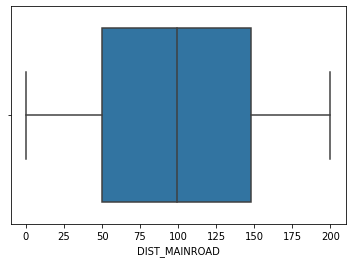

In [173]:
sns.boxplot(df['DIST_MAINROAD'])

# **N_BEDROOM**

In [174]:
df['N_BEDROOM'].unique()

array([ 1.,  2.,  3.,  4., nan])

In [175]:
df['N_BEDROOM'].dtype

dtype('float64')

In [176]:
df['N_BEDROOM'].value_counts()

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


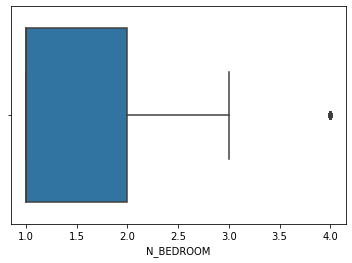

In [177]:
sns.boxplot(df['N_BEDROOM'])

In [178]:
df['N_BEDROOM'] = df['N_BEDROOM'].fillna(df['N_BEDROOM'].mode()[0])

In [179]:
df['N_BEDROOM'] = df['N_BEDROOM'].astype("int64")

In [180]:
df['N_BEDROOM'].dtype

dtype('int64')

# **N_BATHROOM**

In [181]:
df['N_BATHROOM'].unique()

array([ 1.,  2., nan])

In [182]:
df['N_BATHROOM'].isnull().sum()

5

In [183]:
df['N_BATHROOM'].dtype

dtype('float64')

In [184]:
df['N_BATHROOM'] = df['N_BATHROOM'].fillna(df['N_BATHROOM'].mode()[0])

In [185]:
df['N_BATHROOM'] = df['N_BATHROOM'].astype("int64")

In [186]:
df['N_BATHROOM'].dtype

dtype('int64')

# **SALE_COND**

In [187]:
df['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [188]:
df['SALE_COND'].isnull().sum()

0

In [189]:
df['SALE_COND'].value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

In [190]:
df['SALE_COND'] = df['SALE_COND'].replace("Adj Land","AdjLand")
df['SALE_COND'] = df['SALE_COND'].replace("Ab Normal","AbNormal")
df['SALE_COND'] = df['SALE_COND'].replace(['Partiall','PartiaLl'],'Partial')
df['SALE_COND'] = df['SALE_COND'].replace("Normal Sale","NormalSale")

In [191]:
df['SALE_COND'].value_counts()

AdjLand       1439
Partial       1433
NormalSale    1423
AbNormal      1411
Family        1403
Name: SALE_COND, dtype: int64

# **PARK_FACIL**

In [192]:
df['PARK_FACIL'].unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [193]:
df['PARK_FACIL'].value_counts()

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

In [194]:
df['PARK_FACIL'] = df['PARK_FACIL'].replace("Noo","No")

In [195]:
df['PARK_FACIL'].value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

# **DATE_BUILD**

In [196]:
df['DATE_BUILD'].unique()

array(['15-05-1967', '22-12-1995', '09-02-1992', ..., '01-09-1978',
       '11-08-1977', '24-07-1961'], dtype=object)

In [197]:
df['DATE_BUILD'].values[0]

'15-05-1967'

In [198]:
df['DATE_BUILD'].dtype

dtype('O')

In [199]:
df['DATE_BUILD'] = pd.to_datetime(df['DATE_BUILD'])

In [200]:
df['DATE_BUILD'].values[0]

numpy.datetime64('1967-05-15T00:00:00.000000000')

In [201]:
df.dtypes.value_counts()

object            8
int64             8
float64           4
datetime64[ns]    2
dtype: int64

# **BUILDTYPE**

In [202]:
df['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [203]:
df['BUILDTYPE'] = df['BUILDTYPE'].replace("Others","Other")
df['BUILDTYPE'] = df['BUILDTYPE'].replace("Comercial","Commercial")

In [204]:
df['BUILDTYPE'].unique()

array(['Commercial', 'Other', 'House'], dtype=object)

In [205]:
df['BUILDTYPE'].value_counts()

House         2444
Other         2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

# **UTILITY_AVAIL**

In [206]:
df['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [207]:
df['UTILITY_AVAIL'].value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [208]:
df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].replace("All Pub","AllPub")

In [209]:
df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].replace({"NoSewr ": "NoSeWa"})

In [210]:
df['UTILITY_AVAIL'].value_counts()

NoSeWa    3700
AllPub    1887
ELO       1522
Name: UTILITY_AVAIL, dtype: int64

In [211]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

# **STREET**

In [212]:
df['STREET'].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [213]:
df['STREET'].value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [214]:
df['STREET'] = df['STREET'].replace("Pavd","Paved")
df['STREET'] = df['STREET'].replace("No Access","NoAccess")

In [215]:
df['STREET'].value_counts()

Paved       2572
Gravel      2520
NoAccess    2017
Name: STREET, dtype: int64

# **QS_OVERALL**

In [216]:
df['QS_OVERALL'].isnull().sum()

48

In [217]:
df['QS_OVERALL'] = df['QS_OVERALL'].fillna(df['QS_OVERALL'].mean())

In [218]:
df['QS_OVERALL'].isnull().sum()

0

In [219]:
df['QS_OVERALL'].dtype

dtype('float64')

In [220]:
#df[['QS_OVERALL','QS_ROOMS','QS_BATHROOM','QS_BEDROOM']]  = df[['QS_OVERALL','QS_ROOMS','QS_BATHROOM','QS_BEDROOM']].astype("int64")

In [221]:
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [222]:
df.dtypes

PRT_ID                   object
AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM                 int64
N_BATHROOM                int64
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD       datetime64[ns]
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
REG_FEE                   int64
COMMIS                    int64
SALES_PRICE               int64
dtype: object

# **Deriving New Feature**

In [223]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,AnnaNagar,1986,2006-12-19,26,2,1,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,2010-03-13,14,3,2,5,Family,No,...,NoSeWa,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [224]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [225]:
df['DATE_BUILD'].dt.year.unique()

array([1967, 1995, 1992, 1988, 1979, 2009, 1996, 1977, 1991, 1978, 1972,
       1981, 1956, 2000, 1975, 1970, 1986, 1999, 1994, 2008, 1980, 2003,
       2001, 1987, 1989, 1983, 1998, 1985, 1969, 1976, 1993, 1961, 1964,
       1982, 1997, 2007, 1973, 1968, 2006, 1971, 2004, 1966, 2005, 1952,
       1990, 2002, 1974, 1984, 1959, 2010, 1955, 1962, 1953, 1960, 1965,
       1958, 1963, 1957, 1954, 1949, 1951, 1950])

In [226]:
df['AGE'] = df['DATE_SALE'].dt.year-df['DATE_BUILD'].dt.year

In [227]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,AGE
0,P03210,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,...,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,44
1,P09411,AnnaNagar,1986,2006-12-19,26,2,1,5,AbNormal,No,...,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,11
2,P01812,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,...,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,20
3,P05346,Velachery,1855,2010-03-13,14,3,2,5,Family,No,...,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,22
4,P06210,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,...,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,30


# **Exploratory Data Analysis**

# **Area vs SalesPrice**

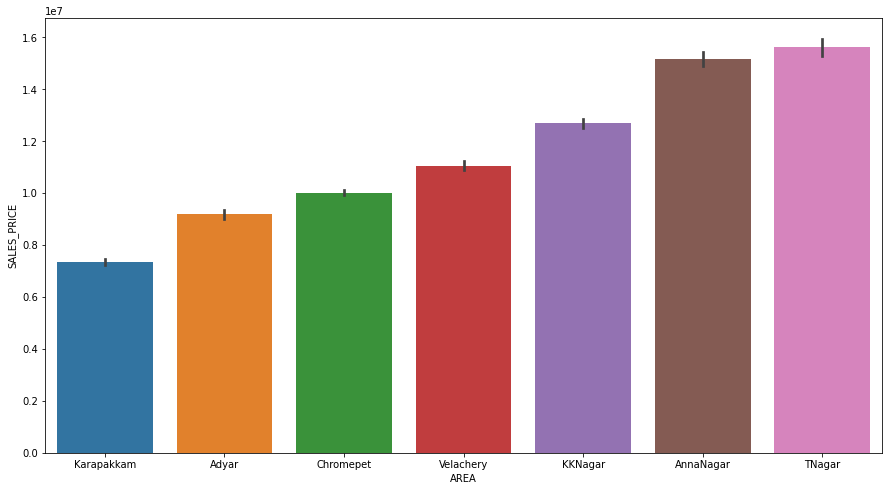

In [228]:
plt.figure(figsize=(15,8))
AREA_order = df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA']
ax = sns.barplot(x='AREA',y='SALES_PRICE',data=df,order = AREA_order)

**1.TNagar and AnnaNagar Area Have High Sales Price**

**2.There will be a Linear Relationship**

**3.so,we can do label encoding**

# **Int_Sqft vs SalesPrice**

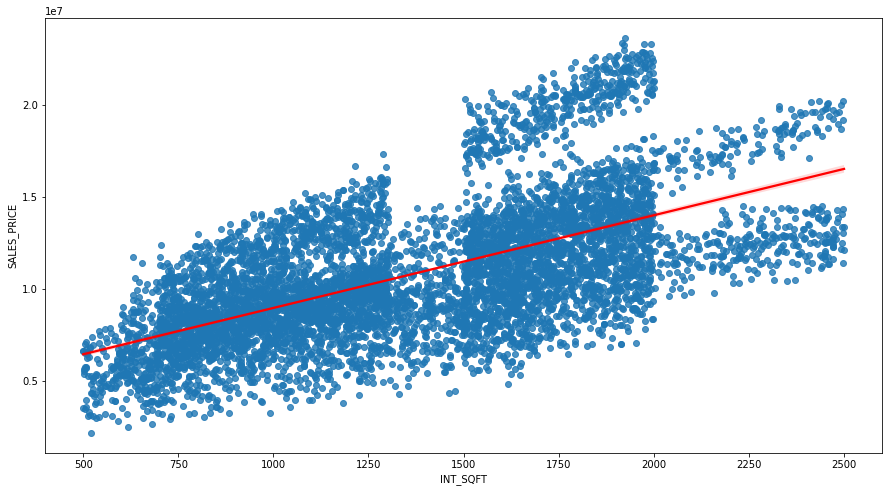

In [229]:
plt.figure(figsize=(15,8))
ax = sns.regplot(x='INT_SQFT',y='SALES_PRICE',data=df, line_kws={'color': 'r'})

**1.There will be a linear Relationship Between Int_sqrt and SalesPrice**

**2.So,We can use this as a Feature**

<Figure size 1080x576 with 0 Axes>

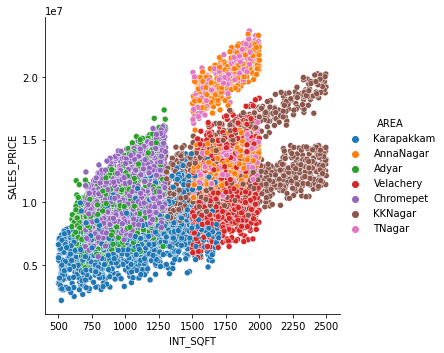

In [230]:
plt.figure(figsize=(15,8))
ax = sns.relplot(x='INT_SQFT',y='SALES_PRICE',hue='AREA',data=df)

# **Dist_Mainroad vs SalesPrice**

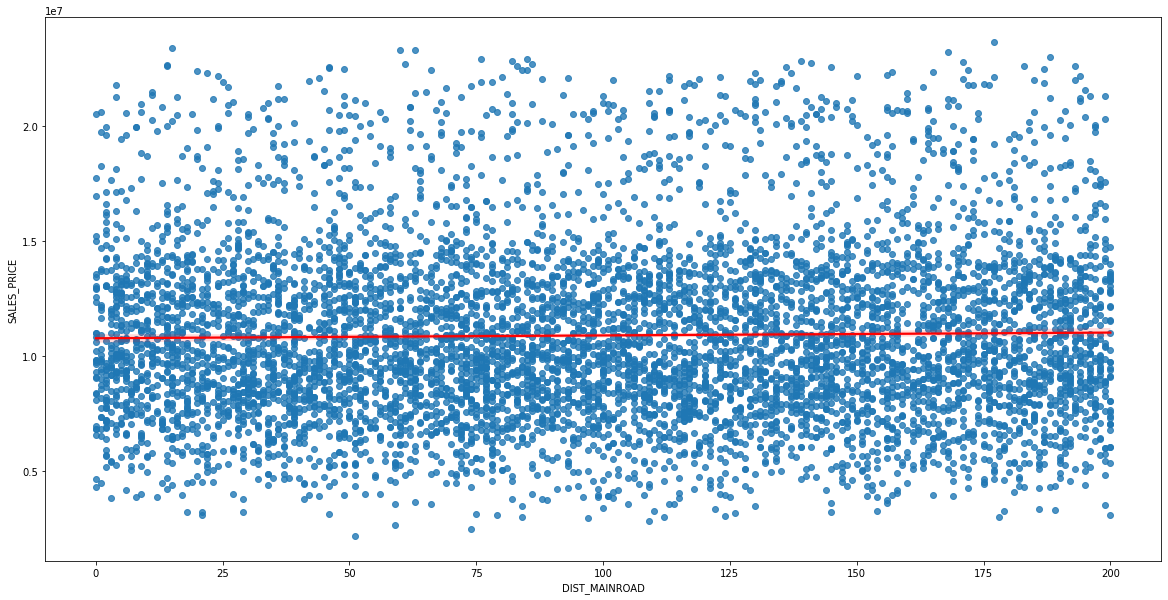

In [231]:
plt.figure(figsize=(20,10))
ax = sns.regplot(x='DIST_MAINROAD',y='SALES_PRICE',data=df, line_kws={'color': 'r'})

**1.There will be No Realationship Between Dist_Mainroad and Sales_Price**

**2.So, We are Not Going To use this as a Feature**

# **N_Bedroom vs Sales_Price**

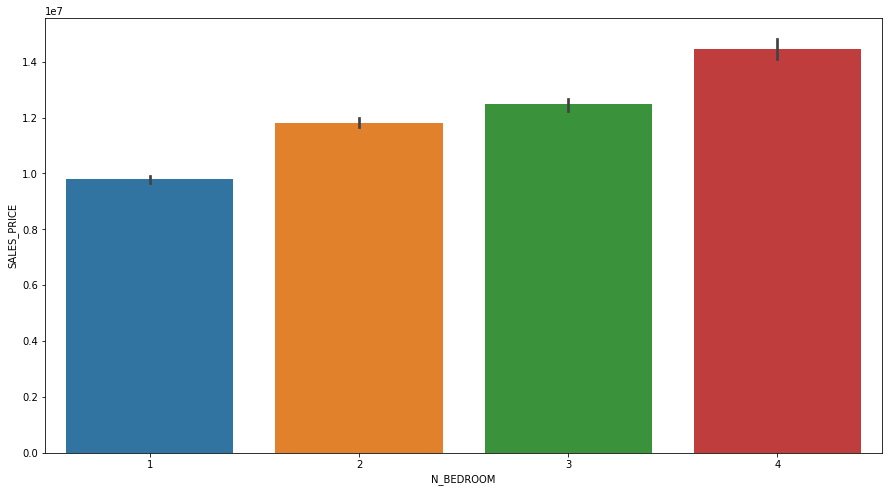

In [232]:
plt.figure(figsize=(15,8))
N_BEDROOM_order = df.groupby('N_BEDROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_BEDROOM']
ax = sns.barplot(x='N_BEDROOM',y='SALES_PRICE',data=df,order = N_BEDROOM_order)

**1.There Will Be a Linear Relationship Between N_bedroom and Sales_Price**

**2.So,We can use this as feature**

**3.we can do label encoding**

<Figure size 1080x576 with 0 Axes>

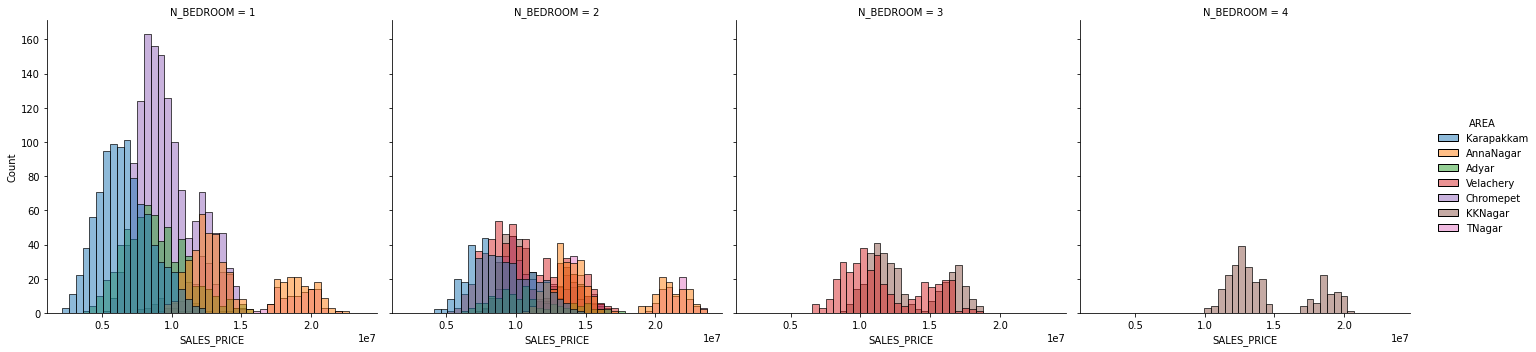

In [233]:
plt.figure(figsize=(15,8))
ax = sns.displot(x='SALES_PRICE',col='N_BEDROOM',hue="AREA",data=df)

**In this KKNagar area only have 4 Bedroom house**

# **N_Bathroom vs Sales_Price**

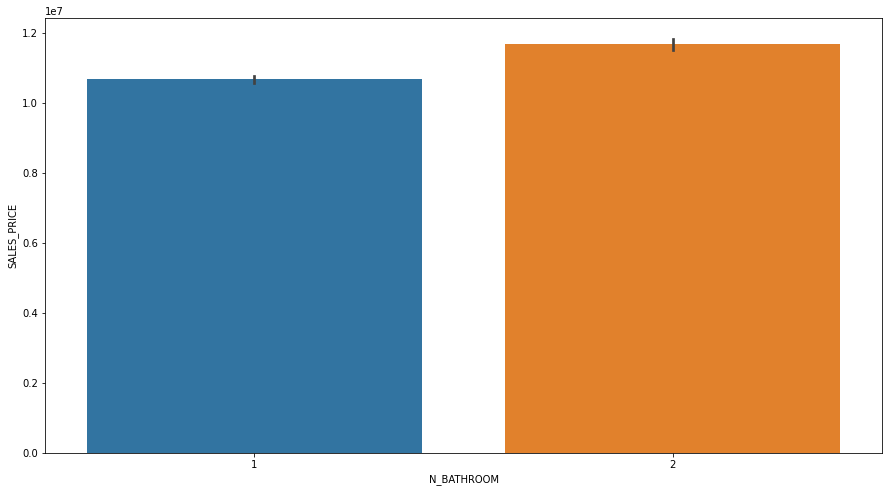

In [234]:
plt.figure(figsize=(15,8))
N_BATHROOM_order = df.groupby('N_BATHROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_BATHROOM']
ax = sns.barplot(x='N_BATHROOM',y='SALES_PRICE',data=df,order = N_BATHROOM_order)

**1.There Will Be a Linear Relationship Between N_bathroom and Sales_Price**

**2.So,We can use this as feature**

**3.we can do label encoding**



<Figure size 1080x576 with 0 Axes>

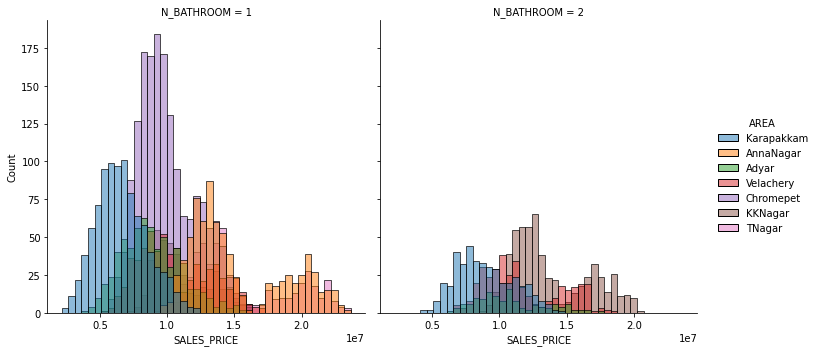

In [235]:
plt.figure(figsize=(15,8))
ax = sns.displot(x='SALES_PRICE',col='N_BATHROOM',hue='AREA',data=df)

# **N_room vs sales_price**

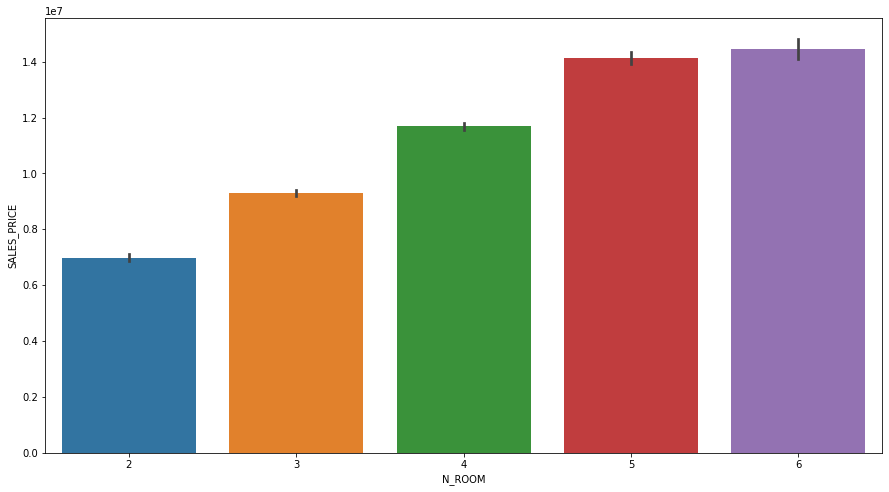

In [236]:
plt.figure(figsize=(15,8))
N_ROOM_order = df.groupby('N_ROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_ROOM']
ax = sns.barplot(x='N_ROOM',y='SALES_PRICE',data=df,order = N_ROOM_order)

**1.There Will Be a Linear Relationship Between N_bedroom and Sales_Price**

**2.So,We can use this as feature**

**3.we can do label encoding**

<Figure size 1080x576 with 0 Axes>

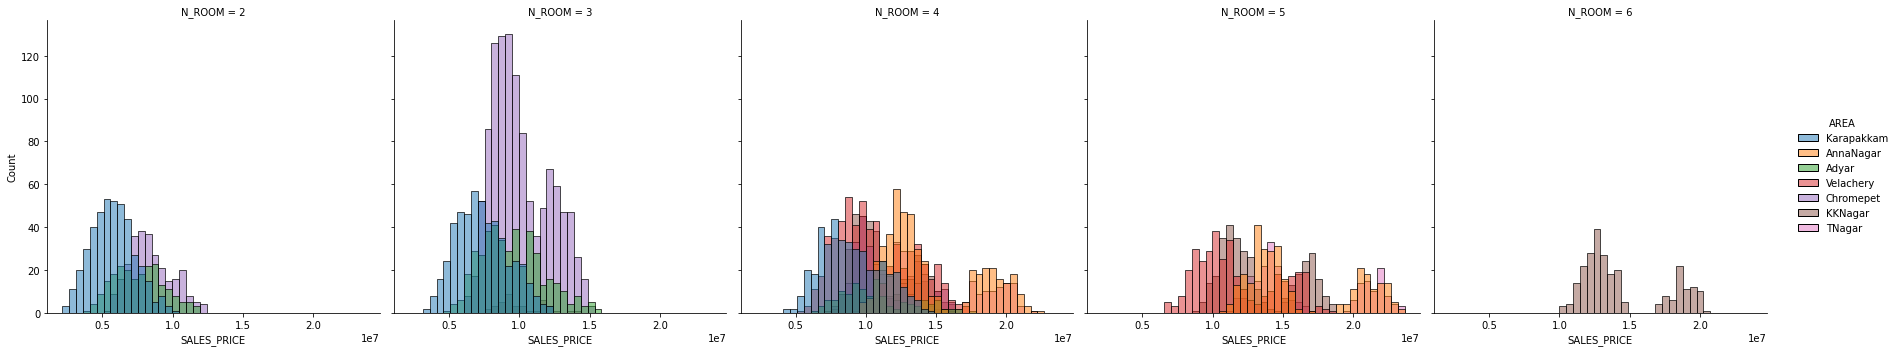

In [237]:
plt.figure(figsize=(15,8))
ax = sns.displot(x='SALES_PRICE',col='N_ROOM',hue='AREA',data=df)

# **sale_cond vs sales_price**

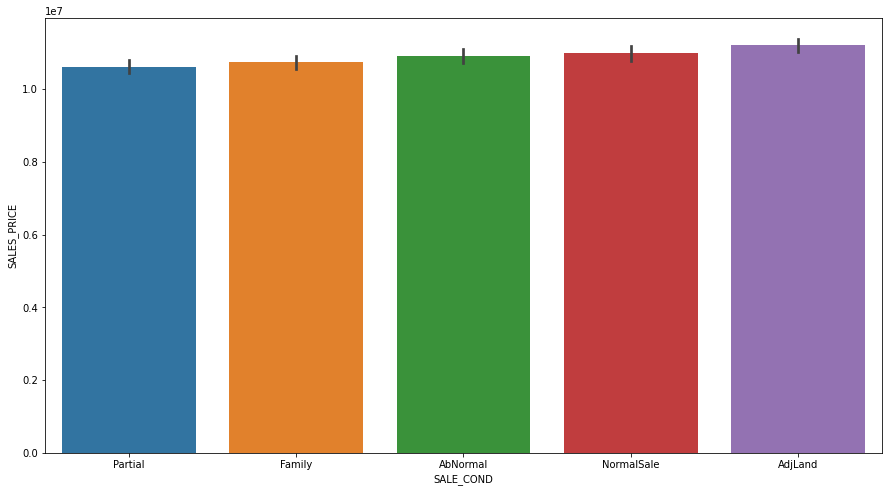

In [238]:
plt.figure(figsize=(15,8))
SALE_COND_order = df.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND']
ax = sns.barplot(x='SALE_COND',y='SALES_PRICE',data=df,order = SALE_COND_order)

**1.There will be No Realationship Between Dist_Mainroad and Sales_Price**

**2.So, We are Not Going To use this as a Feature**

# **Park_Fcil vs Sales_price**

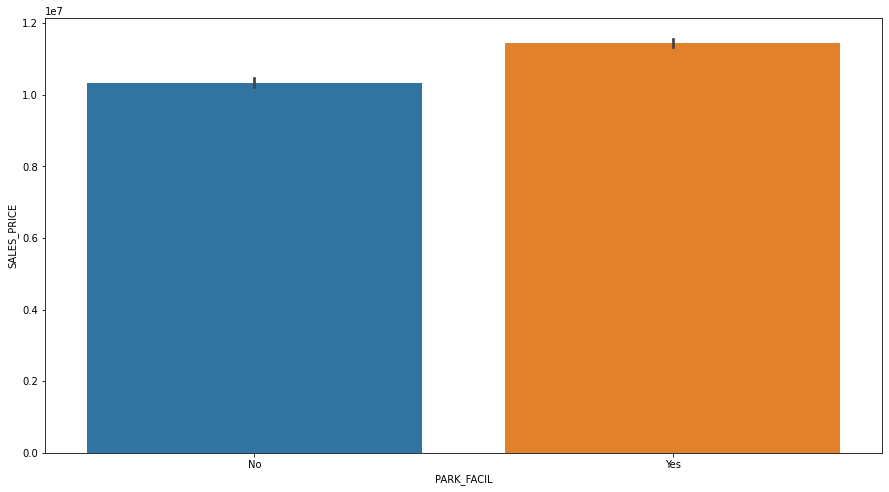

In [239]:
plt.figure(figsize=(15,8))
PARK_FACIL_order = df.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL']
ax = sns.barplot(x='PARK_FACIL',y='SALES_PRICE',data=df,order = PARK_FACIL_order)

**1.There will be Linear Realationship Between Park_facil and Sales_Price**

**2.So, We are Going To do Label encoding**

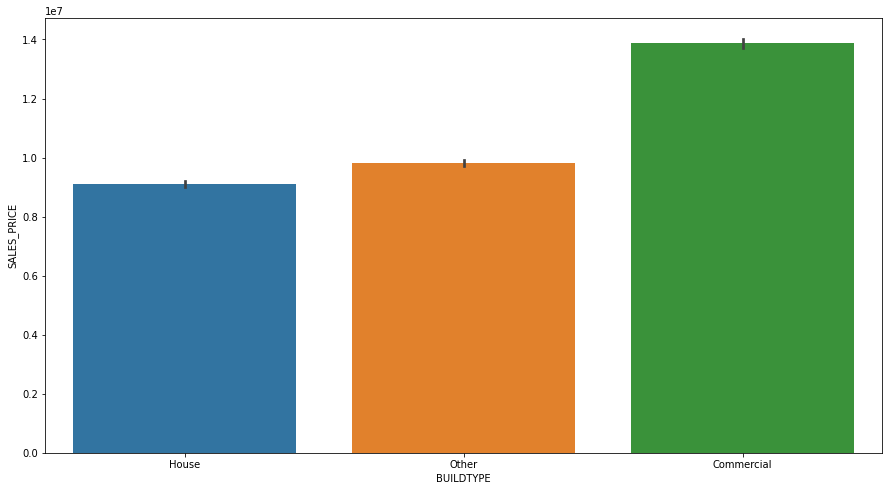

In [240]:
plt.figure(figsize=(15,8))
BUILDTYPE_order = df.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE']
ax = sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=df,order = BUILDTYPE_order)

**1.Ther will be no linear relationship between build_type and sales price**

**2.So,we are going to do onehot encoding**

# **Utility_avail vs Sales_price**

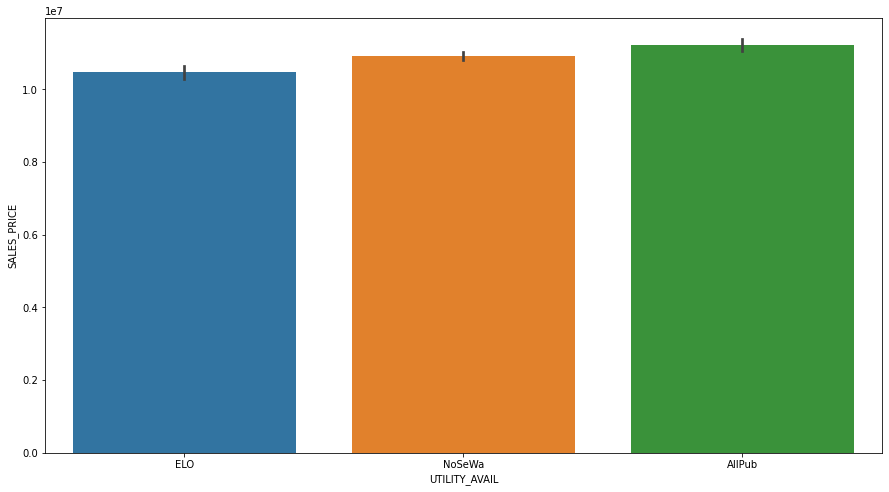

In [241]:
plt.figure(figsize=(15,8))
UTILITY_AVAIL_order = df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL']
ax = sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=df,order = UTILITY_AVAIL_order)

**1.There will be Linear Realationship Between utility_avail and Sales_Price**

**2.So, We are Going To do Label encoding**

# **street vs sales_price**

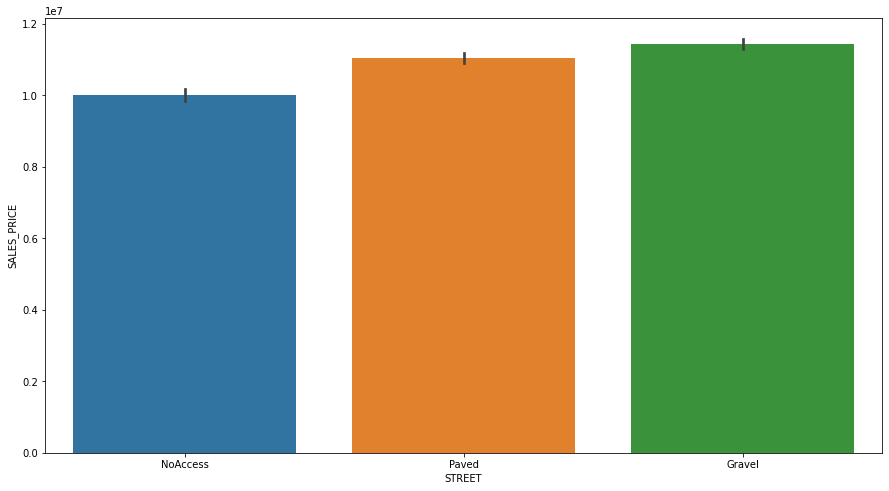

In [242]:
plt.figure(figsize=(15,8))
STREET_order = df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET']
ax = sns.barplot(x='STREET',y='SALES_PRICE',data=df,order = STREET_order)

**1.There will be Linear Realationship Between utility_avail and Sales_Price**

**2.So, We are Going To do Label encoding**

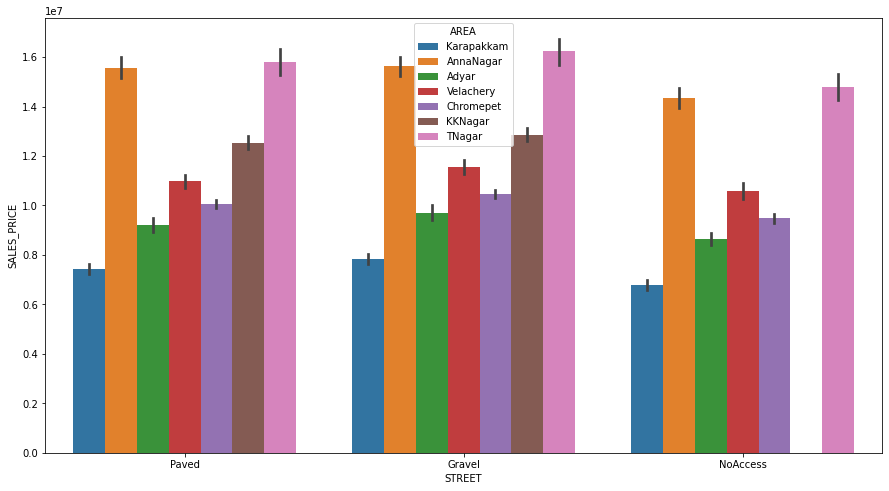

In [243]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x='STREET',y='SALES_PRICE',hue='AREA',data=df)

# **mzzone vs sales_price**

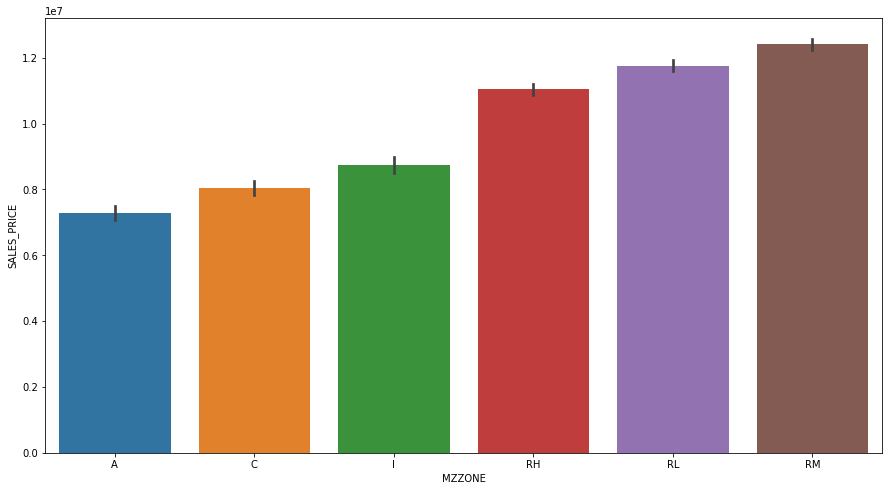

In [244]:
plt.figure(figsize=(15,8))
MZZONE_order = df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE']
ax = sns.barplot(x='MZZONE',y='SALES_PRICE',data=df,order = MZZONE_order)
#0,1,2,4,5,6

**1. There will be a linear relstionship between mzzone and sales_price**

**2.A,C,I have same linear relationship and RH,RL,RM have same linear relationship**

**3.So,we can use label encoding by skiping 3**

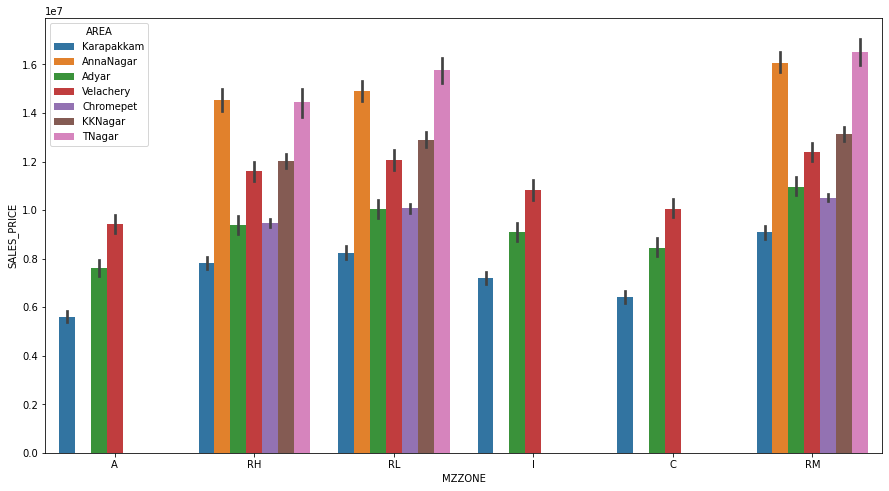

In [245]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x='MZZONE',y='SALES_PRICE',hue='AREA',data=df)

# **Age vs sales_price**

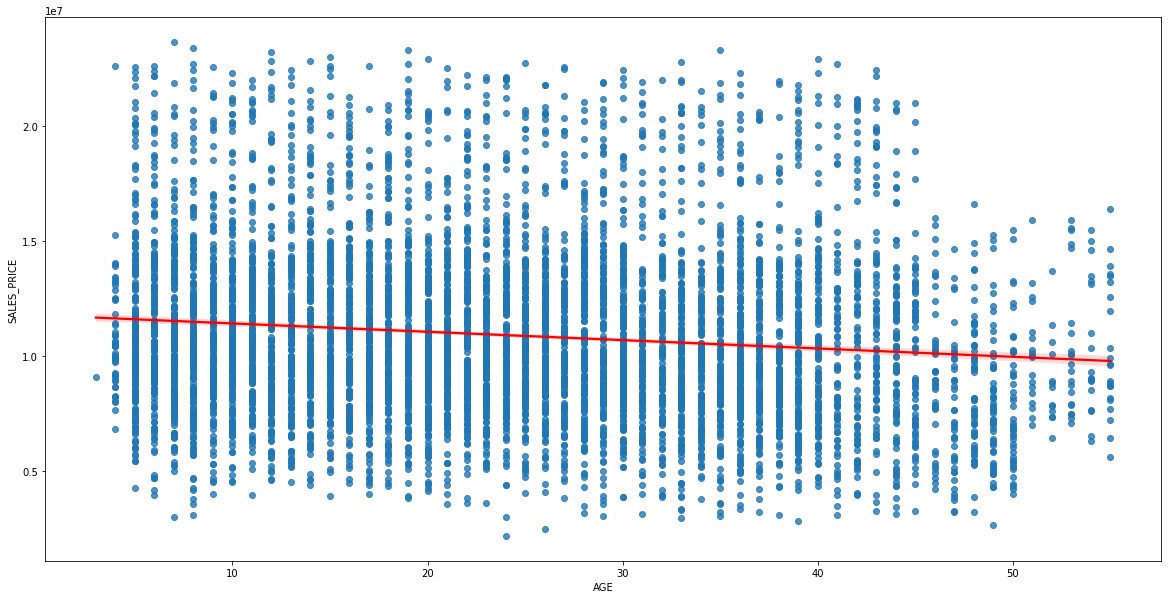

In [246]:
plt.figure(figsize=(20,10))
ax = sns.regplot(x='AGE',y='SALES_PRICE',data=df, line_kws={'color': 'r'})

# **Delete the unimportant Feature**

In [247]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'AGE'],
      dtype='object')

In [248]:
df = df.drop(['PRT_ID','REG_FEE','COMMIS','DATE_SALE','DATE_BUILD','QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL','SALE_COND'],axis=1)

In [249]:
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE
0,Karapakkam,1004,131,1,1,3,Yes,Commercial,AllPub,Paved,A,7600000,44
1,AnnaNagar,1986,26,2,1,5,No,Commercial,AllPub,Gravel,RH,21717770,11
2,Adyar,909,70,1,1,3,Yes,Commercial,ELO,Gravel,RL,13159200,20
3,Velachery,1855,14,3,2,5,No,Other,NoSeWa,Paved,I,9630290,22
4,Karapakkam,1226,84,1,1,3,Yes,Other,AllPub,Gravel,C,7406250,30


# **Encoding**

In [250]:
#df = pd.get_dummies(df,columns=["BUILDTYPE"])

In [251]:
df['BUILDTYPE'] = df['BUILDTYPE'].map({'Commercial':3, 'Other':2, 'House':1})

In [252]:
df['AREA'] = df['AREA'].map({'Karapakkam':0, 'AnnaNagar':5, 'Adyar':1, 'Velachery':3, 'Chromepet':2,
    'KKNagar':4, 'TNagar':6})

In [253]:
df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].map({'AllPub':2, 'ELO':0, 'NoSeWa':1})

In [254]:
df['STREET'] = df['STREET'].map({'Paved':1, 'Gravel':2, 'NoAccess':0})

In [255]:
df['MZZONE'] = df['MZZONE'].map({'A':0, 'RH':4, 'RL':5, 'I':2, 'C':1, 'RM':6})

In [256]:
df['PARK_FACIL'] = df['PARK_FACIL'].map({'Yes':1, 'No':0})

In [257]:
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE
0,0,1004,131,1,1,3,1,3,2,1,0,7600000,44
1,5,1986,26,2,1,5,0,3,2,2,4,21717770,11
2,1,909,70,1,1,3,1,3,0,2,5,13159200,20
3,3,1855,14,3,2,5,0,2,1,1,2,9630290,22
4,0,1226,84,1,1,3,1,2,2,2,1,7406250,30


In [258]:
df.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET',
       'MZZONE', 'SALES_PRICE', 'AGE'],
      dtype='object')

In [259]:
df.dtypes

AREA             int64
INT_SQFT         int64
DIST_MAINROAD    int64
N_BEDROOM        int64
N_BATHROOM       int64
N_ROOM           int64
PARK_FACIL       int64
BUILDTYPE        int64
UTILITY_AVAIL    int64
STREET           int64
MZZONE           int64
SALES_PRICE      int64
AGE              int64
dtype: object

# **Splitting and scalling**

In [260]:
X = df[['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'AGE', 'BUILDTYPE']].values 
y = df['SALES_PRICE'].values 

In [261]:
original_feature = df[['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'AGE', 'BUILDTYPE']]

In [262]:
print(f"Independent features has {X.shape[0]} rows and {X.shape[1]} columns")
print(f"Dependent features has {y.shape[0]} rows and 1 column")

Independent features has 7109 rows and 11 columns
Dependent features has 7109 rows and 1 column


In [263]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [264]:
print("The shape of X train:", X_train.shape)
print("The shape of X test:", X_test.shape)
print("The shape of y train:", y_train.shape)
print("The shape of y test:", y_test.shape)

The shape of X train: (4976, 11)
The shape of X test: (2133, 11)
The shape of y train: (4976,)
The shape of y test: (2133,)


In [265]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler() 
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

# **LinearRegression**

In [266]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [267]:
from sklearn.metrics import  r2_score
y_pred = regressor.predict(X_test_scaled)
rsquared = r2_score(y_test,y_pred)
print("R2 Value: {}".format(rsquared))

R2 Value: 0.8735495334244187


# **KNN-Regression**

In [268]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions 
from sklearn.model_selection import cross_val_score 
for i in [1,2,3,4,5,6,7,8,9,10,20,50]: 
  knn = KNeighborsRegressor(i) 
  knn.fit(X_train_scaled,y_train) 
  print("K value  : " , i,"train_score;",knn.score(X_train_scaled,y_train), " score : ", np.mean(cross_val_score(knn, X_train_scaled, y_train, cv=10)))

K value  :  1 train_score; 0.9999968216569917  score :  0.9023477795374657
K value  :  2 train_score; 0.9784165361054219  score :  0.923776964146929
K value  :  3 train_score; 0.9679143369004711  score :  0.9316535640728214
K value  :  4 train_score; 0.9639345527884495  score :  0.9321936125478659
K value  :  5 train_score; 0.9591296406600445  score :  0.9314942152079603
K value  :  6 train_score; 0.9550292186861655  score :  0.9295630229746138
K value  :  7 train_score; 0.9505497011549047  score :  0.9279312933677166
K value  :  8 train_score; 0.9466679973442969  score :  0.9269078340671631
K value  :  9 train_score; 0.9439687327209536  score :  0.9263398518806424
K value  :  10 train_score; 0.9414961785158386  score :  0.9247951485894568
K value  :  20 train_score; 0.9243387684633857  score :  0.9126829850803719
K value  :  50 train_score; 0.8897579802673384  score :  0.879127819979504


In [269]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(4)
knn.fit(X_train_scaled,y_train)
y_pred = knn.score(X_test_scaled,y_test)

In [270]:
from sklearn.metrics import  r2_score
y_pred = knn.predict(X_test_scaled)
rsquared = r2_score(y_test,y_pred)
print("R2 Value: {}".format(rsquared))

R2 Value: 0.9334263890111866


# **Decision Tree**

In [271]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.metrics import r2_score
for depth in [1,2,3,4,5,6,7,8,9,10,20,40,60]:
  dt = DecisionTreeRegressor(max_depth=depth) 
  dt.fit(X_train, y_train) 
  trainAccuracy = r2_score(y_train, dt.predict(X_train)) 
  dt = DecisionTreeRegressor(max_depth=depth) 
  valAccuracy = cross_val_score(dt, X_train, y_train, cv=10, scoring = make_scorer(r2_score)) 
  print("depth :",depth, "train_R2 :",trainAccuracy, "val scaore :" ,np.mean(valAccuracy))

depth : 1 train_R2 : 0.3592696881051952 val scaore : 0.35676297296453263
depth : 2 train_R2 : 0.6805117976302182 val scaore : 0.6791662640970615
depth : 3 train_R2 : 0.8052110733669087 val scaore : 0.8039451631717693
depth : 4 train_R2 : 0.8889332242782813 val scaore : 0.8836798055898252
depth : 5 train_R2 : 0.9235203451855588 val scaore : 0.9159035918530034
depth : 6 train_R2 : 0.9445795286637078 val scaore : 0.934776803383663
depth : 7 train_R2 : 0.9601318677961193 val scaore : 0.9498415887321114
depth : 8 train_R2 : 0.9730487095553456 val scaore : 0.9605568296764828
depth : 9 train_R2 : 0.9829612304389422 val scaore : 0.9668369482812922
depth : 10 train_R2 : 0.989791997935444 val scaore : 0.9702476432654628
depth : 20 train_R2 : 0.9999982542432791 val scaore : 0.972767369865946
depth : 40 train_R2 : 0.9999984108284958 val scaore : 0.9724899239767879
depth : 60 train_R2 : 0.9999984108284958 val scaore : 0.972599304722681


In [272]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth = 20)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=20)

In [273]:
from sklearn.metrics import  r2_score
y_pred = dt.predict(X_test)
rsquared = r2_score(y_test,y_pred)
print("R2 Value: {}".format(rsquared))

R2 Value: 0.9723637951132341


# **Random forest regression**

In [274]:
X.shape

(7109, 11)

In [275]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rf = RandomForestRegressor(n_estimators= 100, max_depth = 4, max_features='sqrt')
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

In [276]:
from sklearn.metrics import  r2_score
y_pred = rf.predict(X_test_scaled)
rsquared = r2_score(y_test,y_pred)
print("R2 Value: {}".format(rsquared))

R2 Value: 0.8628965035082538


# **XG boster**

In [277]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) 
  model.fit(X_train,y_train) 
  model.score(X_test, y_test) 
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  -0.36745534174562544  Cross-Val score :  -0.3757116977695134
Learning rate :  0.02  Train score :  0.749484428465585  Cross-Val score :  0.7454627629341426
Learning rate :  0.03  Train score :  0.926191248679273  Cross-Val score :  0.9232393178038005
Learning rate :  0.04  Train score :  0.9629978756685416  Cross-Val score :  0.96045180575802
Learning rate :  0.05  Train score :  0.9749662823165511  Cross-Val score :  0.9727861878743109
Learning rate :  0.06  Train score :  0.9813960254406411  Cross-Val score :  0.9785813982142104
Learning rate :  0.07  Train score :  0.9849215545650452  Cross-Val score :  0.9827907716890714
Learning rate :  0.08  Train score :  0.9879039872939702  Cross-Val score :  0.9856912158827195
Learning rate :  0.09  Train score :  0.9893955808301556  Cross-Val score :  0.9878816859795874
Learning rate :  0.1  Train score :  0.9909286577231866  Cross-Val score :  0.9893500755938384
Learning rate :  0.11  Train score :  0.99

In [278]:
model = xgb.XGBRegressor(learning_rate = 0.5, n_estimators=100)
model.fit(X_train,y_train) 
model.score(X_test, y_test) 

[07:00:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9933939952763409

In [279]:
from sklearn.metrics import  r2_score
y_pred = model.predict(X_test)
rsquared = r2_score(y_test,y_pred)
print("R2 Value: {}".format(rsquared))

R2 Value: 0.9933939952763409


# **R2 Square of every Model**

In [280]:
from sklearn.metrics import  r2_score
print("R2 Value for Linear Regression: {}".format(r2_score(y_test,regressor.predict(X_test_scaled))))
print("R2 Value for KNN Regression: {}".format(r2_score(y_test,knn.predict(X_test_scaled))))
print("R2 Value for DecisionTreeRegressor: {}".format(r2_score(y_test,dt.predict(X_test))))
print("R2 Value for RandomForestRegressor: {}".format(r2_score(y_test,rf.predict(X_test_scaled))))
print("R2 Value for XGBooster: {}".format(r2_score(y_test,model.predict(X_test))))

R2 Value for Linear Regression: 0.8735495334244187
R2 Value for KNN Regression: 0.9334263890111866
R2 Value for DecisionTreeRegressor: 0.9723637951132341
R2 Value for RandomForestRegressor: 0.8628965035082538
R2 Value for XGBooster: 0.9933939952763409


# **So,We are going to take XG-Booster so doing label encoding for buildtype**

# **Feature importance using Random Forest algorithm**

In [281]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(original_feature.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: AREA                 Importance: 0.3
Variable: BUILDTYPE            Importance: 0.27
Variable: INT_SQFT             Importance: 0.19
Variable: N_ROOM               Importance: 0.11
Variable: MZZONE               Importance: 0.07
Variable: N_BEDROOM            Importance: 0.04
Variable: N_BATHROOM           Importance: 0.01
Variable: PARK_FACIL           Importance: 0.01
Variable: UTILITY_AVAIL        Importance: 0.0
Variable: STREET               Importance: 0.0
Variable: AGE                  Importance: 0.0


# **Area and Age of the Bulding is very important to Derive the price.**

# **Importing the Best model using pickle package**

In [284]:
import pickle
filename = "house_prediction_model"
pickle.dump(model,open(filename,'wb'))

In [285]:
loaded_model = pickle.load(open(filename,'rb'))
loaded_model.predict(X_test)

[07:01:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([13423622. , 12514304. , 18867326. , ..., 13983540. ,  8597840. ,
        6573859.5], dtype=float32)